In [ ]:
import numpy as np

In [ ]:
def select_dataset(ID):
  ID_last_two_digits = str(ID)[-2:]
  if np.mod(int(ID_last_two_digits), 3) == 0:
    dataset = 'Boston Housing Data'
  elif np.mod(int(ID_last_two_digits), 3) == 1:
    dataset = 'Boston Housing Data'
  else:
    dataset = 'Wine quality Data'
  return dataset

select_dataset(20215018)

'Boston Housing Data'

Introduction to Data Science with Python

# **Assignment: EDA Report on Boston Housing Data**
Source: http://lib.stat.cmu.edu/datasets/boston

**EDA by: Jobaida Gulsanara Jarin (ID: 20215018)**

EDA Date: 10th October 2021

Course: Professional Masters in Applied Statistics and Data Science (ASDS)

**Importing Libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn import datasets
from sklearn.utils import Bunch
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
##from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
import warnings


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the Boston Housing Data**

In [ ]:
#To get the BOSTON data from sklearn dataset
boston = datasets.load_boston()
#Transforming the data into pandas Dataframe
#Predictor variable
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
#Target variable
df_boston['PRICE'] = boston.target
#observing first 5 rows and last 5 rows
df_boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
boston['data'].shape

(506, 13)

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

**Table-1: Appending the following five rows with my dataframe:**

|CRIM||ZN||INDUS||CHAS||NOX||RM||AGE||DIS||RAD||TAX||PTRATIO||B||LSTAT||PRICE|
|:-||:-||:-||:-||:-||:-||:-||:-||:-||:-||:-||:-||:-||:-|
|0.069||10||2.3||0||0.53||6.5||65.2||4.01||1||290||15||395||4.9||24.0|
|0.69+X||10+X||2.3+ .X||0||0.5+ .X||6.5+ .X||65.2+ .X||4.1+ .X||1||290+X||15+X||395+X||4.9+ .X||24.3+X|
|0.68+X||11+X||2.4+ .X||0||0.6+ .X||6.6+ .X||65.1+ .X||4.0+ .X||1||291+X||13+X||390+X||4.2+ .X||24.2+X|
|0.67+X||12+X||2.5+ .X||0||0.4+ .X||6.5+ .X||65.3+ .X||4.2+ .X||1||292+X||14+X||392+X||4.3+ .X||24.1+X|
|0.66+X||13+X||2.4+ .X||0||0.7+ .X||6.5+ .X||65.4+ .X||4.1+ .X||1||293+X||16+X||391+X||4.4+ .X||24.2+X|

Here, 
- X is the two last digits of my ID and 
- .X is the two last digits of my ID with a decimal point.

In [ ]:
row_1 = np.array([0.069, 10,	2.3,	0,	0.53,	6.5,	65.2,	4.01,	1,	290,	15,	395,	4.9,	24.0])
print(row_1)
#row_2 = [0.69+X		10+X		2.3+ .X		0		0.5+ .X		6.5+ .X		65.2+ .X		4.1+ .X		1		290+X		15+X		395+X		4.9+ .X		24.3+X]
row_2 = np.array([0.69+18,	10+18,	2.3+0.18,	0, 0.5+0.18,	6.5+0.18,	65.2+0.18,	4.1+0.18,	1,	290+18,	15+18,	395+18, 4.9+0.18,	24.3+18])
print(row_2)
#row_3 = [0.68+X		11+X		2.4+ .X		0		0.6+ .X		6.6+ .X		65.1+ .X		4.0+ .X		1		291+X		13+X		390+X		4.2+ .X		24.2+X]
row_3 = np.array([0.68+18, 11+18, 2.4+0.18, 0, 0.6+0.18, 6.6+0.18, 65.1+0.18, 4.0+0.18, 1, 291+18, 13+18, 390+18, 4.2+0.18, 24.2+18])
print(row_3)
#row_4 = [0.67+X		12+X		2.5+ .X		0		0.4+ .X		6.5+ .X		65.3+ .X		4.2+ .X		1		292+X		14+X		392+X		4.3+ .X		24.1+X]
row_4 = np.array([0.67+18, 12+18, 2.5+0.18, 0, 0.4+0.18, 6.5+0.18, 65.3+0.18, 4.2+0.18, 1, 292+18, 14+18, 392+18, 4.3+0.18, 24.1+18])
print(row_4)
#row_5 = [0.66+X		13+X		2.4+ .X		0		0.7+ .X		6.5+ .X		65.4+ .X		4.1+ .X		1		293+X		16+X		391+X		4.4+ .X		24.2+X]
row_5 = np.array([0.66+18, 13+18, 2.4+0.18, 0, 0.7+0.18, 6.5+0.18, 65.4+0.18, 4.1+0.18, 1, 293+18, 16+18, 391+18, 4.4+0.18, 24.2+18])
print(row_5)

[6.90e-02 1.00e+01 2.30e+00 0.00e+00 5.30e-01 6.50e+00 6.52e+01 4.01e+00
 1.00e+00 2.90e+02 1.50e+01 3.95e+02 4.90e+00 2.40e+01]
[ 18.69  28.     2.48   0.     0.68   6.68  65.38   4.28   1.   308.
  33.   413.     5.08  42.3 ]
[ 18.68  29.     2.58   0.     0.78   6.78  65.28   4.18   1.   309.
  31.   408.     4.38  42.2 ]
[ 18.67  30.     2.68   0.     0.58   6.68  65.48   4.38   1.   310.
  32.   410.     4.48  42.1 ]
[ 18.66  31.     2.58   0.     0.88   6.68  65.58   4.28   1.   311.
  34.   409.     4.58  42.2 ]


In [ ]:
data_row_series = [pd.Series(row_1, index=df_boston.columns), pd.Series(row_2, index=df_boston.columns), pd.Series(row_3, index=df_boston.columns), pd.Series(row_4, index=df_boston.columns), pd.Series(row_5, index=df_boston.columns)]
df = df_boston.append(data_row_series, ignore_index=True)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.20,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.90,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.10,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.80,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.20,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.06900,10.0,2.30,0.0,0.530,6.500,65.20,4.0100,1.0,290.0,15.0,395.00,4.90,24.0
507,18.69000,28.0,2.48,0.0,0.680,6.680,65.38,4.2800,1.0,308.0,33.0,413.00,5.08,42.3
508,18.68000,29.0,2.58,0.0,0.780,6.780,65.28,4.1800,1.0,309.0,31.0,408.00,4.38,42.2
509,18.67000,30.0,2.68,0.0,0.580,6.680,65.48,4.3800,1.0,310.0,32.0,410.00,4.48,42.1


- df_boston has displayed 506 rows x 14 columns: imported Boston housing data from sklearn.
- After appending 5 rows, df is displaying 511 rows x 14 columns.
- df is displaying new 5 rows at the tail.

**So, We have successfully appended 5 new rows with our dataframe.**

Now we will work with our new dataframe df to do furthur analysis.


# **1. Description of the data:**

**Where it came from:**


In [ ]:
boston = datasets.load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    float64
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    float64
 9   TAX      511 non-null    float64
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  PRICE    511 non-null    float64
dtypes: float64(14)
memory usage: 56.0 KB


**What it is:**

The data has following features:
- 511 observations and 14 non constant independent variables. Of these, price is the response variable while the other 13 variables are possible predictors. 

- All these collumns be marged together to form a Pandas DataFrame for ease of reference and agility with visualization tools such as Seaborn, Matplotlib. Apart from Pandas we will also use the Numpy library wherever required.

Table-2 represents all the variables description with their value level, level of measurements, and suitable measures.



**Table 2: Variables summary information of Boston Housing Dataset.**

|Variable Name||Variable Description||Value Level||Level of measurements||Appropriate measures|
|---||:-||:-||:-:||:-:|
|crim||Per capita crime rate by town||||Ratio||mean, median, mode|
|zn||Proportion of residential land zoned for lots over 25,000 sq.ft||||Ratio||mean, median, mode|
|indus||proportion of non-retail business acres per town||||Ratio||mean, median, mode|
|chas||Charles River dummy variable ||1 = if tract bounds river; <br> 0 = otherwise||Nominal||Mode|
|nox||nitric oxides concentration||parts per 10 million||Ratio||mean, median, mode|
|rm ||average number of rooms per dwelling||||Interval||mean, median, mode|
|age||proportion of owner-occupied units built prior to 1940||||Ratio||mean, median, mode|
|dis||weighted distances to five Boston employment centres||||Interval||mean, median, mode|
|rad|| index of accessibility to radial highways||index value: 1-24, <br> larger index denotes better accessibility||Ordinal||median, mode|
|tax|| full-value property-tax rate per USD 10,000||||Ratio||mean, median, mode|
|ptratio||pupil-teacher ratio by town||||Interval||mean, median, mode|
|black ||proportion of blacks by town||1000(Bk - 0.63)^2 <br> where Bk is the proportion of blacks by town||Ratio||mean, median, mode|
|lstat||percentage of lower status of the population||||Ratio||mean, median, mode|
|price||median value of owner-occupied homes in USD 1000’s||||Ratio||mean, median, mode|



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.724485,8.663297,0.00632,0.08210,0.26169,3.735965,88.9762
ZN,511.0,11.502935,23.263231,0.00000,0.00000,0.00000,15.000000,100.0000
INDUS,511.0,11.052505,6.879195,0.46000,5.13000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,511.0,0.556019,0.116767,0.38500,0.44900,0.53800,0.624000,0.8800
RM,511.0,6.288346,0.700220,3.56100,5.88750,6.21100,6.630000,8.7800
AGE,511.0,68.543679,28.012305,2.90000,45.25000,76.90000,93.950000,100.0000
DIS,511.0,3.799259,2.095829,1.12960,2.10215,3.26280,5.118000,12.1265
RAD,511.0,9.465753,8.705323,1.00000,4.00000,5.00000,24.000000,24.0000
TAX,511.0,407.232877,168.015343,187.00000,279.50000,330.00000,666.000000,711.0000


describe() is providing the basic statistics of the dataset like mean, median, 1st quartile, 2nd quartile, standard deviation, range etc.

Here we can see that variable 'crim' and 'black' take wide range of values.

Variables 'crim', 'zn', 'rm' and 'black' have a large difference between their median and mean which indicates lot of outliers in respective variables.

**Summary Measures:**

Using df.describe(), df.mode() commands we can construct the summery table.

In [ ]:
df_boston.mode()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Table-3: Summary measures of different variables of Boston Housing Dataset:**

|Variable Name||Mean||Median||Mode||Standard Deviation|
|:-||:-||:-||:-||:-|
|CRIM (Per capita crime rate per town) ||The average crime is 3.7% by town||0.26||0.15 or 14.3||8.7|
|ZN (Proportion of residential land zone)||On average 11.5% are residential land zone||0||0||23.26|
|INDUS (Proportion of non-retail business area)||On average 11.05% are industrial area||9.7||18.1||6.9|
|CHAS (Charles River dummy variable)||-||0||0; most of the tract are not bounded by the river||-|
|NOX (Nitric Oxides concentration)||The average Nitric oxide concentration is 0.56 ppm||0.54||0.54||0.12|
|RM (Average number of rooms per dwelling)||The average room number is 6||6.2||5 to 6 rooms are most frequent||0.7|
|AGE (proportion of owner-occupied units built prior to 1940)||On average 68.5% units built prior to 1940||76.9||100||28.01|
|DIS (weighted distances to five Boston employment centres)||On average 3.8% distant||3.3||3.5||2.09|
|RAD (Index of accessibility to radial highways)||-||5||24 No radial highway is used most frequently||-| 
|TAX (full-value property-tax rate per USD 10,000)||USD 407.23 tax per USD 10000||330||666||168|
|PTRATIO (pupil-teacher ratio by town)||18.6 pupil for 1 teacher||19.1||20.2||2.5|
|B (Proportion of Black people in town)||357.1 people are black in 1000||391.7||1||396.9|
|LSTAT (percentage of lower status of the population)||On average 12.6% people are lower status||11.28||6.36, 7.79, 8.05, 14.10 and 18.13||7.15|
|PRICE (median value of owner-occupied homes in USD 1000’s)||The average house price is USD 22689.628||21200||50000||9315.08|

# **2. Objectives:**


**Research Problem:** 

Examine the influence of several neighborhood attributes on the prices of housing. Predict whether house price will rise or fall based upon the per capita crime rate by town, proportion of residential land zoned for lots over 25,000 sq.ft, proportion of non-retail business acres per town, nitric oxides concentration, average number of rooms per dwelling, proportion of owner-occupied units built prior to 1940, weighted distances to five Boston employment centres, index of accessibility to radial highways, tax rate, pupil-teacher ratio, proportion of blacks by town, percentage of lower status of the population.

As our main objective is to predict the house price for Boston Housing dataset, hence a model is required to make such prediction. Since the response variable (PRICE) is dependent on multiple variable, so a Multiple Linear Regression Model is more suitable for this dataset. Before using the model it is required to check the validity of all underlying assumptions of that model. Based on the valid assumptions, we could find an how appropriate the model is for our dataset. 




**Objectives for EDA:**

Our main objectives are identification and pattern study of variables significantly affecting the prices of homes. House price of Boston is the main response variable for our study, as we have to predict that using remaining variables.  Hence, to establish the main objective of our study, we could specify the following objectives.

- Discovering any neghbourhood variable whether or not influenced clean air (NOX).
- Understanding housing preferences of "Customer Segment": Population from lower strata of society (LSTAT)
- Exploring houses around the Charles River (CHAS) are more expensive or not.
- Distance to the main employment centers (DIS) influence House Prices or not. 
- Building Multiple linear regression machine learning model to predict house prices.

# **3. Data Cleaning:**

In the phase of data cleaning, we are interested to check the missing values and the outliers of our data set.

- Using df_new.isnull().sum() we have found no NAN values in CRIM, ZN, INDUS, CHAS, AGE, LSTAT and other variables. We do not need to treat missing values.


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

This returns the number of missing values in the data set. So, the number of missing values is 0 in our dataset.

# **4. Constructing suitable plots of the data:**

**Exploring Outliers:**
Now we will make the boxplot to see the outliers in this dataset.

Text(0.5, 1.0, 'Figure-2: Box plot for the variables of the boston housing data')

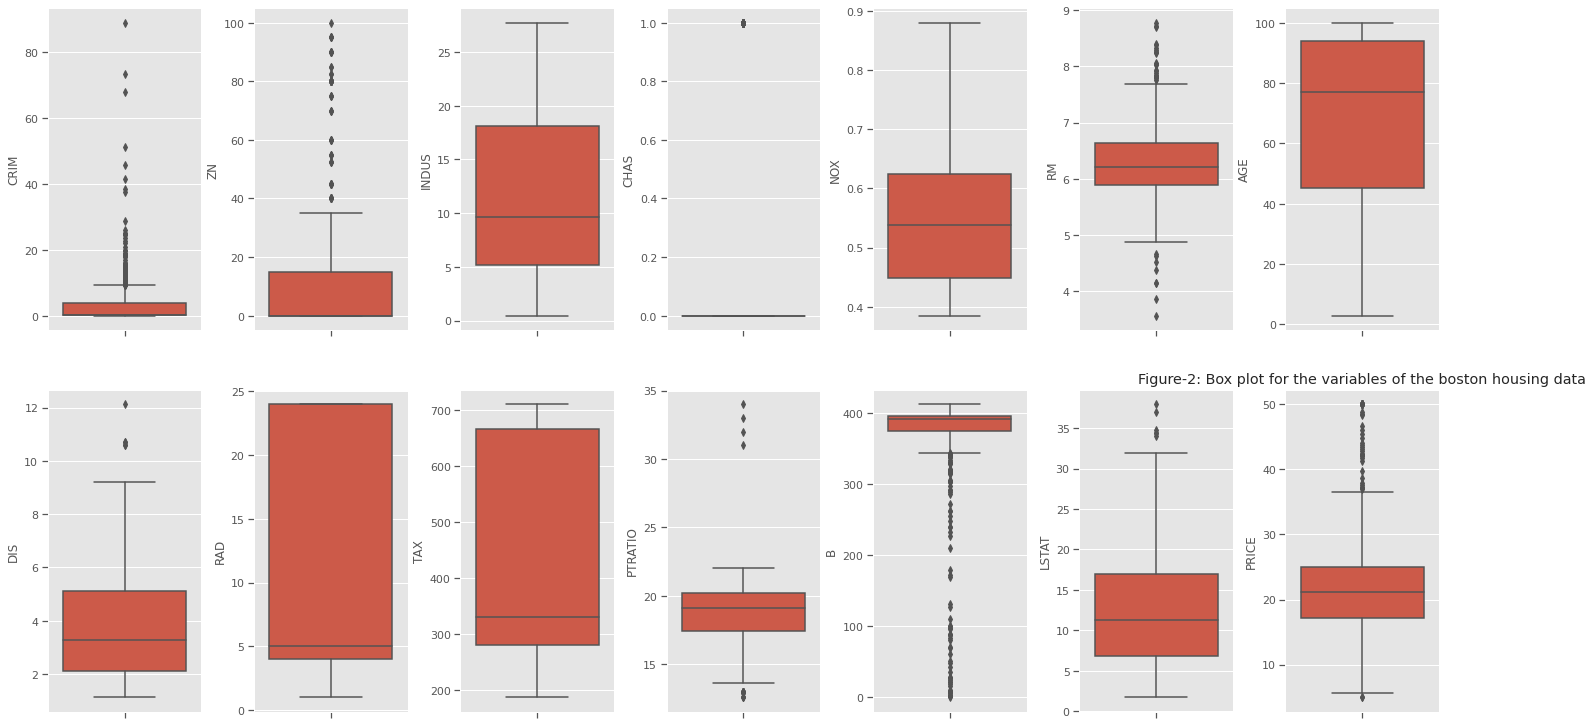

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.title('Figure-2: Box plot for the variables of the boston housing data')

**Table-5: Interpretation using the boxplot:**

|Observation||Outlair||Skewness|
|:-||:-||:-|
|CRIM||So many outlairs are spreaded over the maximum values||Moderate positive skewed|
|ZN||So many outlairs are spreaded over the maximum values||Moderate positive skewed|
|INDUS||No outlairs detected||Positive skewed|
|CHAS||-||We cannot consider categorical variable.|
|NOX||No outlairs detected||Positive skewed|
|RM||So many outlairs are spreaded over the maximum values and under the minimum values||nearly symmetric|
|AGE||No outlairs detected||Negative skewed|
|DIS||Some outlairs detected over the maximum values||Positive skewed|
|RAD||-||We cannot consider categorical variable.|
|TAX||No outlairs detected||Negative skewed|
|PTRATIO||Some outlairs are spreaded over the maximum values and under the minimum values||Negative skewed|
|B||So many outlairs are spreaded over the minimum values||Negative skewed|
|LSTAT||Some outlairs are spreaded over the maximum values||Positive skewed|
|PRICE||So many outlairs are spreaded over the maximum values and some outlairs are detected under the minimum values||nearly symmetric|

**Histograms to show the distribution of the variable values:**


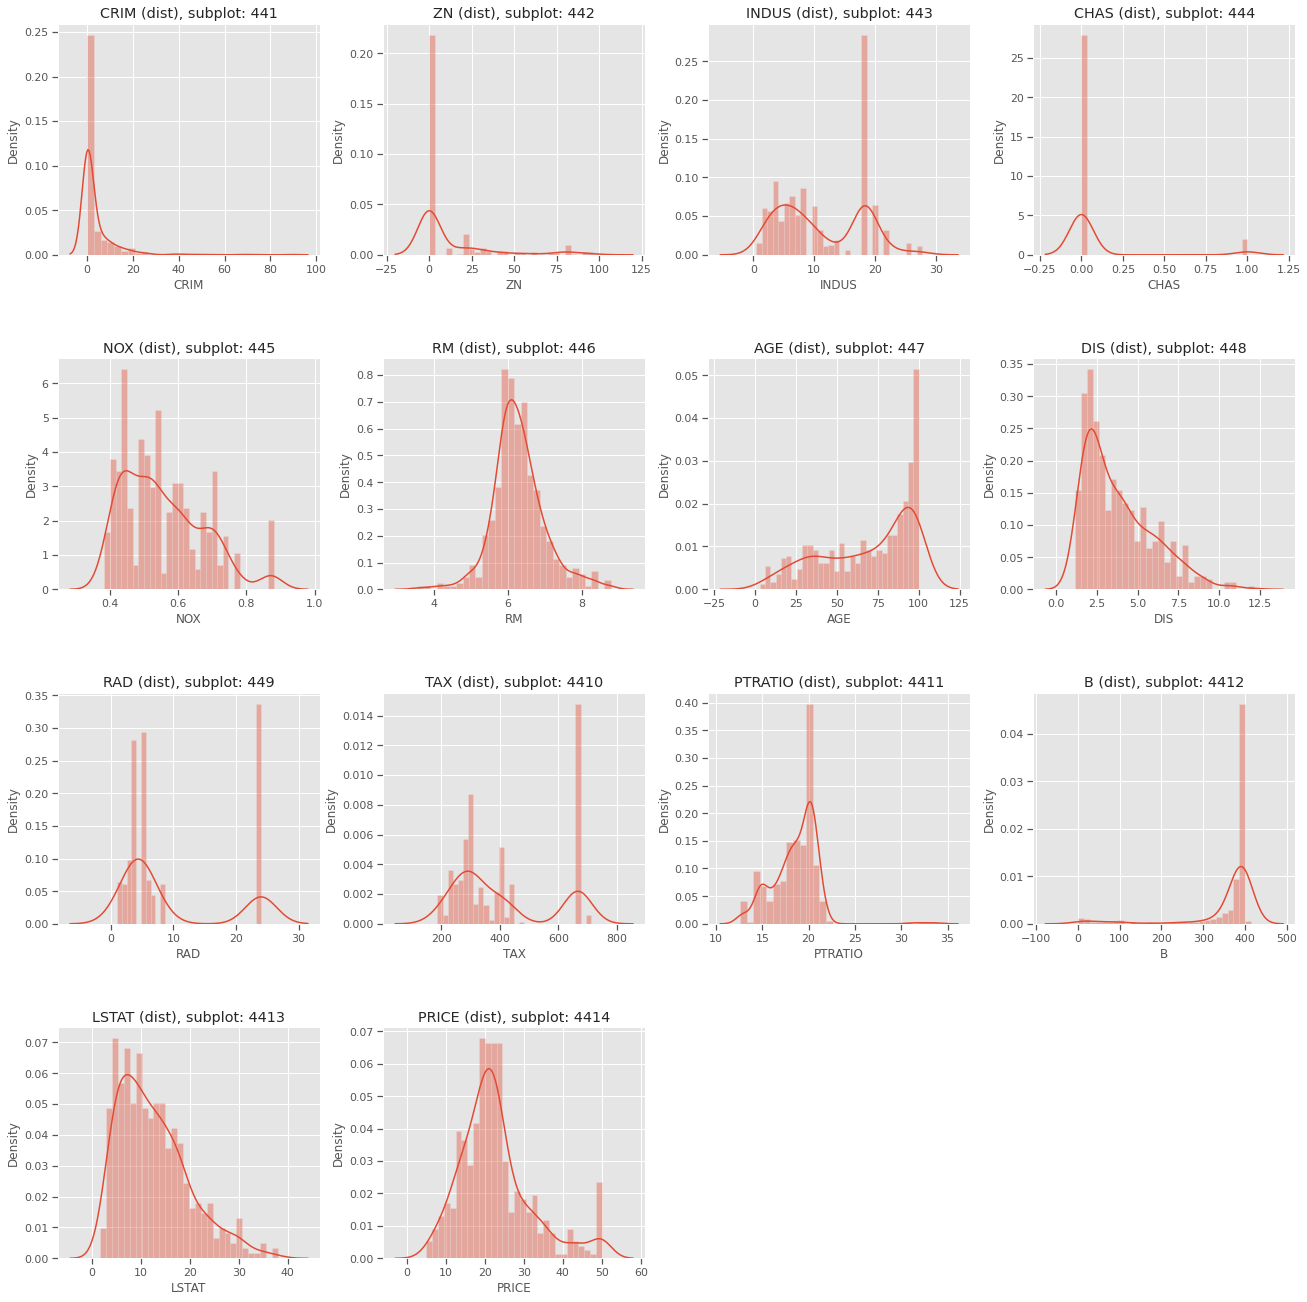

In [ ]:
#To ignore warning (Comment it under development) 
warnings.simplefilter(action='ignore', category=FutureWarning)

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,18))

for i in df:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i], bins=30)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

**Table-4: Variable's disribution summary of Boston Housing Dataset.**

|Variable Name||Shape|
|:-||:-|
|CRIM||Skewed right|
|ZN||Skewed right|
|INDUS||Bimodal distribution|
|CHAS||Categorical data distributed in two bins 0 and 1|
|NOX||Skewed right|
|RM||Symmetric, normal distribution|
|AGE||Skewed left|
|DIS||Skewed right|
|RAD||Categorical data distributed into 9 categori and 9 bins|
|TAX||Bimodal distribution|
|PTRATIO||about to normal distribution with large range of max values|
|B||about to normal distribution with large range of min values|
|LSTAT||Skewed right|
|PRICE||Symmetric, about to normal distribution|


**CHAS and RAD are categorical variable. So it will be readable if we display their observations in pie chart.**

In [ ]:
#Pie plot
chas = df['CHAS'].value_counts()
print(chas)
plt.pie(chas, labels=['Otherwise', 'Tract bounds river'], colors=['yellowgreen', 'lightcoral'],  autopct='%.1f%%')
plt.title('Figure-3: Pie Diagram of CHAS of boston housing data')
plt.show()

Figure-3 illustrates the tract bound to the Charles river of Boston housing area. There are 93.2% tract are not bounded by the Charles river and only 6.8% tracts are bounded by the river.

In [ ]:
rad = df['RAD'].value_counts()
print(rad)

Next we are going to create a Barplot that is used for categorical and discrete values. We have explored RAD is the discrete variable in our dataset. RAD is Index of accessiblity to radial highways. This scores the house based on the proximity for accessibility to radial highways. So the larger the score, the better the accessibility.

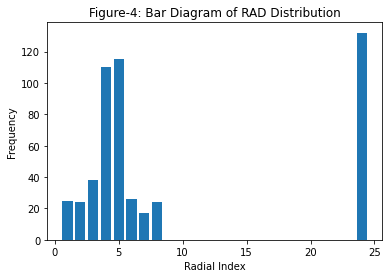

In [ ]:
#Bar Diagram
plt.bar(rad.index, height=rad)
plt.ylabel('Frequency')
plt.xlabel('Radial Index')
plt.title('Figure-4: Bar Diagram of RAD Distribution')
plt.show()

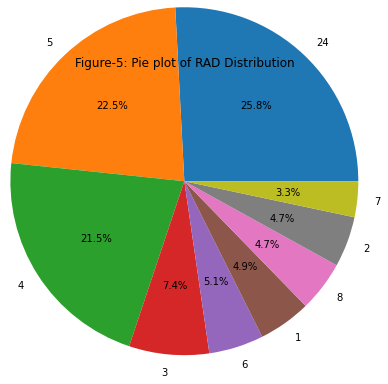

In [ ]:
#Pie plot
plt.pie(rad, labels=['24', '5', '4', '3', '6', '1', '8', '2', '7'],  autopct='%.1f%%', radius=2)
plt.title('Figure-5: Pie plot of RAD Distribution')
plt.show()

**Figure-4: Pie Diagram of RAD Distribution**

Figure-3 and 4 illustrates the accessibility to radial highways, Index 24 is the nearest (best accessible) to the house and Index 7 is the distant (least accessible). 

# **5. The correlation between the median value of owner-occupied homes with other variables.**

We can display this correlation with Bivariate Analysis:

Calculate the pairwise correlations for our  columns by running the cell containing the following code:



In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.186990,0.382860,-0.058677,0.431213,-0.208416,0.347057,-0.371981,0.602614,0.567345,0.325058,-0.372282,0.433133,-0.348475
ZN,-0.186990,1.000000,-0.535871,-0.044205,-0.499655,0.314376,-0.568810,0.664074,-0.315579,-0.316716,-0.303342,0.178336,-0.416196,0.366077
INDUS,0.382860,-0.535871,1.000000,0.065760,0.734352,-0.394664,0.641197,-0.704951,0.599748,0.721382,0.277777,-0.360428,0.609102,-0.492409
CHAS,-0.058677,-0.044205,0.065760,1.000000,0.086953,0.089642,0.086783,-0.099664,-0.004723,-0.033886,-0.116243,0.047228,-0.050623,0.167558
NOX,0.431213,-0.499655,0.734352,0.086953,1.000000,-0.290962,0.721034,-0.756953,0.589921,0.651935,0.229094,-0.368145,0.567276,-0.389968
RM,-0.208416,0.314376,-0.394664,0.089642,-0.290962,1.000000,-0.240484,0.206018,-0.213712,-0.294236,-0.281539,0.130661,-0.615061,0.692096
AGE,0.347057,-0.568810,0.641197,0.086783,0.721034,-0.240484,1.000000,-0.747892,0.454940,0.506177,0.221475,-0.273713,0.599885,-0.372206
DIS,-0.371981,0.664074,-0.704951,-0.099664,-0.756953,0.206018,-0.747892,1.000000,-0.494118,-0.534534,-0.191012,0.292146,-0.496107,0.249324
RAD,0.602614,-0.315579,0.599748,-0.004723,0.589921,-0.213712,0.454940,-0.494118,1.000000,0.910129,0.359520,-0.446933,0.494065,-0.389586
TAX,0.567345,-0.316716,0.721382,-0.033886,0.651935,-0.294236,0.506177,-0.534534,0.910129,1.000000,0.373853,-0.443588,0.546315,-0.469337


Now This is quite a big matrix. And it has more than the information required. We are going to narrow down the information.

So, here we are giong to see the correlation of the independent variable with the target variable. 

In [ ]:
df.corr()['PRICE']

CRIM      -0.348475
ZN         0.366077
INDUS     -0.492409
CHAS       0.167558
NOX       -0.389968
RM         0.692096
AGE       -0.372206
DIS        0.249324
RAD       -0.389586
TAX       -0.469337
PTRATIO   -0.339063
B          0.336870
LSTAT     -0.739084
PRICE      1.000000
Name: PRICE, dtype: float64

**To make this large correlation matrix more representable and easy to analyse, we can visualize it with a heatmap using Seaborn library.**

Text(0.5, 1.0, 'Figure-6: Heatmap of boston housing data')

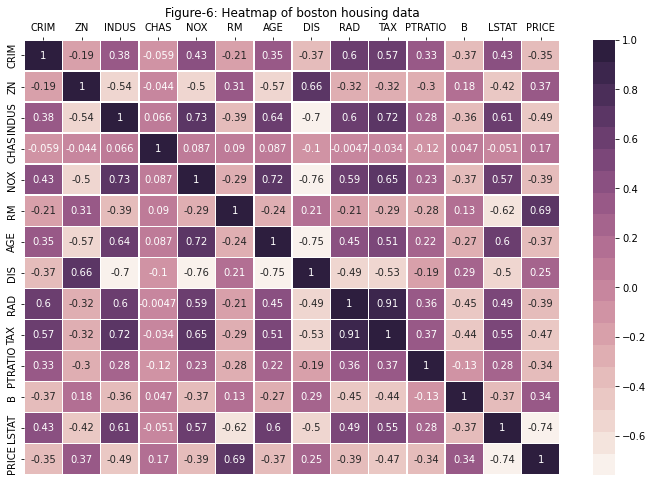

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15), annot=True, linewidth=0.5)
ax.xaxis.tick_top() # move labels to the top
plt.title('Figure-6: Heatmap of boston housing data')
#plt.savefig('../figures/lesson-1-boston-housing-corr.png', bbox_inches='tight', dpi=300)

**Table-6: Interpretation of correlation coefficient (Karl Pearson's correlation coefficient):**

|Corr. with PRICE||Corr.Value||Comment|
|:-||:-||:-|
|CRIM||-0.348475 (Weak negative)||Where crime rate is high, house price is low.|
|ZN||0.366077 (Weak positive)||Where the proportion of residential land zone high, house price is high.|
|INDUS||-0.492409 (Moderate negative)||Industrial area is not suitable for living, so house price is decreasing here.|
|CHAS||-||We cannot consider categorical variable.|
|NOX||-0.389968 (Weak negative)||High Nitric Oxide concentration is harmful for human health, so house price is low where NOX is high.|
|RM||0.692096 (Strong positive)||House price increases with room number of per dweller increases.|
|AGE||-0.372206 (Weak negative)||If the maximum unit is buit before 1940, the price become lower.|
|DIS||0.249324 (Weak positive)||House price are high of the distant to employment centres|
|RAD||-||We cannot consider categorical variable.|
|TAX||-0.469337 (Moderate negative)||Where we have to pay higher TAX, house price become lower.|
|PTRATIO||-0.339063 (Weak negative)||Where number of pupils increases for 1 teacher, house price decreases|
|B||0.336870 (Weak positive)||Where the number of Black people increases in 1000 population, the house price increses.|
|LSTAT||-0.739084 (Strong negative)||The house price decreses in the area of lower status people.|

**Graphical Representations:**

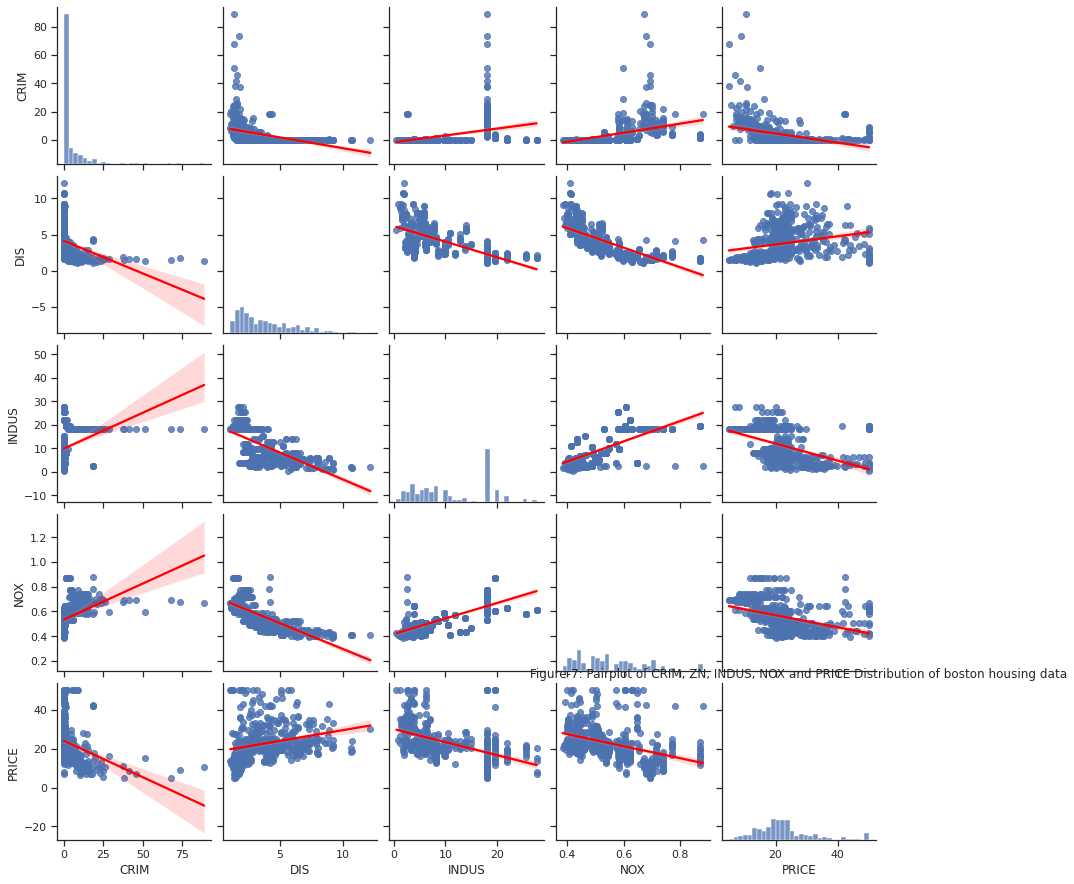

In [ ]:
select_first_four = ['CRIM','DIS','INDUS','NOX', 'PRICE']
df_1_4 = df[select_first_four]

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_1_4, kind="reg", plot_kws={'line_kws':{'color':'red'}}, diag_kws={'bins': 30})
plt.title('Figure-7: Pairplot of CRIM, ZN, INDUS, NOX and PRICE Distribution of boston housing data')
plt.show()

**CRIM, ZN, INDUS, NOX and PRICE of boston housing data are showing linear Relationship. So, Linear regression model will be suitable for them.**

**From CRIM-PRICE plot, it shows that the house prices are higher in areas with lower crime.**

**From NOX-INDUS plot, Strong positive linear correlation. That means Industrial zone is most concentrated with Nitric oxide.**

**The most interesting factors to consider are nitrogen oxide levels and distance to the main employment centers. And house prices increase when the distance of employment center increase.**

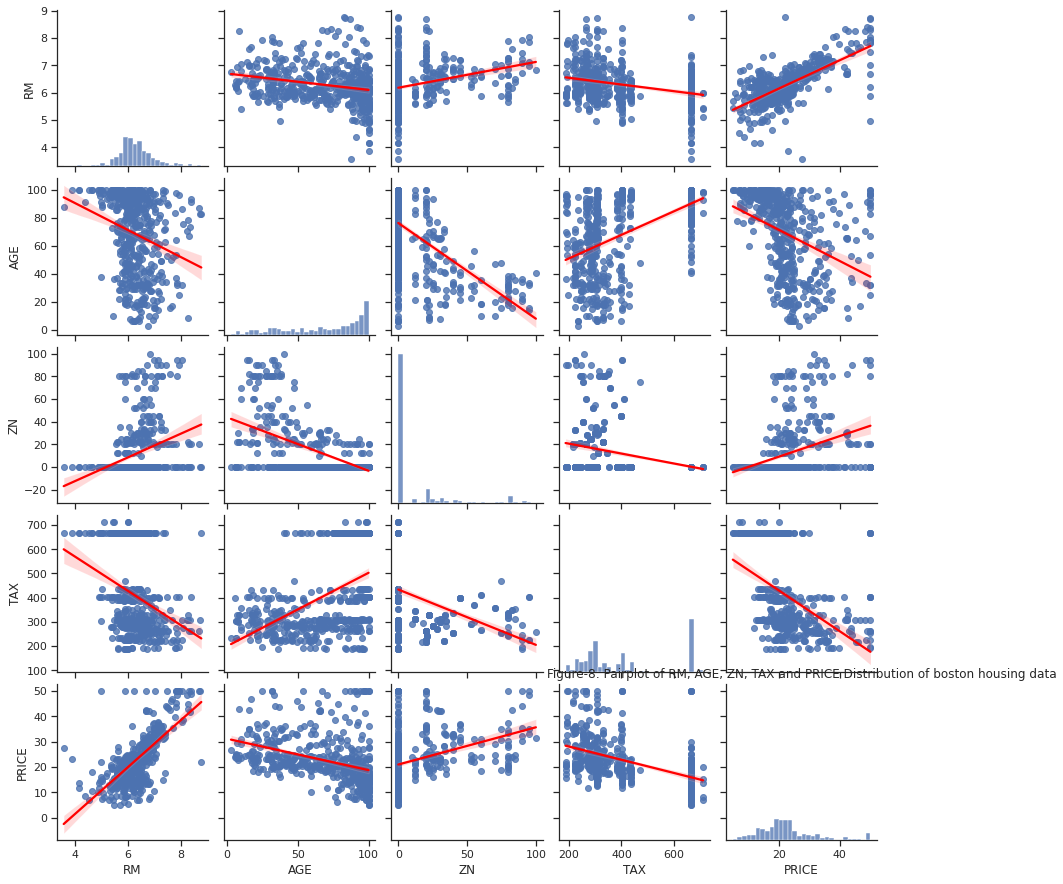

In [ ]:
select_2nd_four = ['RM','AGE','ZN','TAX', 'PRICE']
df_2_4 = df[select_2nd_four]

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_2_4, kind="reg", plot_kws={'line_kws':{'color':'red'}}, diag_kws={'bins': 30})
plt.title('Figure-8: Pairplot of RM, AGE, ZN, TAX and PRICE Distribution of boston housing data')
plt.show()

**RM, AGE, ZN, TAX and PRICE of boston housing data are showing linear Relationship. So, Linear regression model will be appropriate for them.**

**Looking at the histograms on the diagonal, we see the following:**

**1. RM and PRICE have the closest shape to normal distributions.**

**2. AGE is skewed to the left and DIS is skewed to the right.**

**3. For TAX, we find a large amount of the distribution is around 700.**

**4. The number of rooms per house (RM) is highly correlated (Strongly positive linear) with the median house value (MDEV). Houses with more rooms are pricier.**

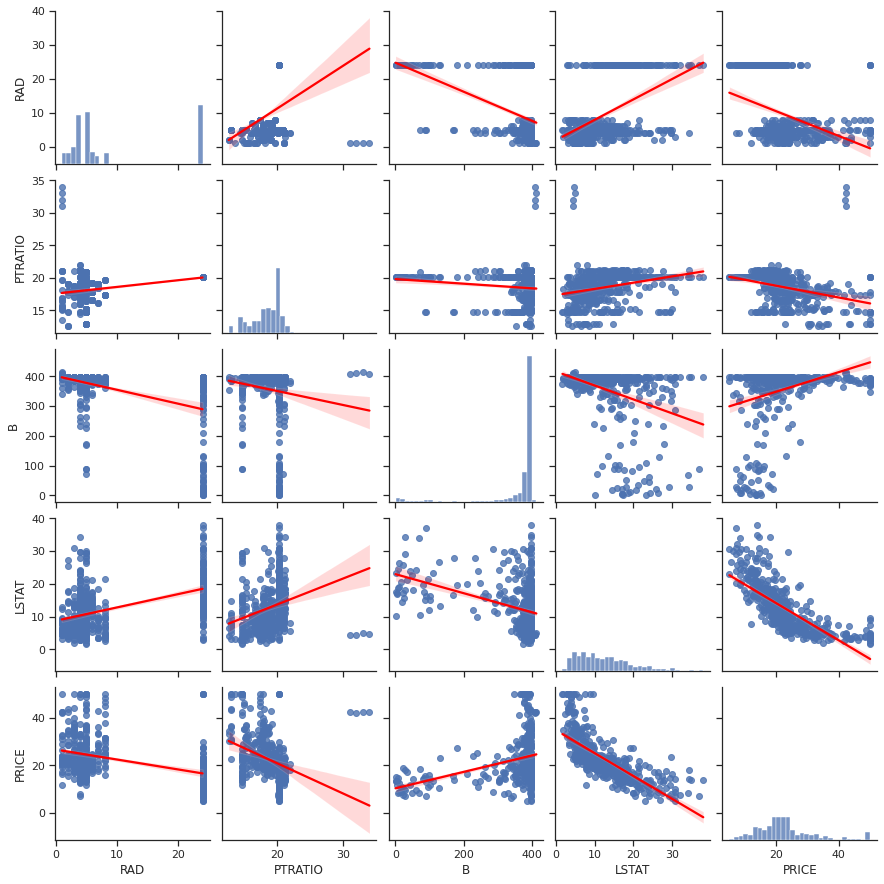

In [ ]:
select_3rd_three = ['RAD', 'PTRATIO','B','LSTAT','PRICE']
df_3_3 = df[select_3rd_three]

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_3_3, kind="reg", plot_kws={'line_kws':{'color':'red'}}, diag_kws={'bins': 30})
#plt.title('Figure-9: Pairplot of RAD, PTRATIO, B, LSTAT and PRICE Distribution of boston housing data')
fig.suptitle('Figure-9: Pairplot of RAD, PTRATIO, B, LSTAT and PRICE Distribution of boston housing data')
plt.show()

**RAD, PTRATIO, B, LSTAT and PRICE of boston housing data are showing linear Relationship. So, Linear regression model will be suitable for them.**

**The population that is lower class (LSTAT) is highly correlated (positive non-linear) with the median house value (PRICE).**

In [ ]:
chas = df['CHAS'].value_counts()
print(chas)

In [ ]:
df_map = df.copy()
df_map['CHAS'] = df_map['CHAS'].map({0:'Otherwise', 1:'Tract bounds river'})
sns.boxplot(x='CHAS', y='PRICE', data=df_map)
plt.title('Figure 10: Boxplot of PRICE at Charles river bound tract Distribution of Boston Housing Dataset')
plt.grid()
plt.show()

**The house prices tend to be higher closer to the Charles River.**

In [ ]:
rad = df_map['RAD'].value_counts()
print(rad)

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
1.0      25
2.0      24
8.0      24
7.0      17
Name: RAD, dtype: int64


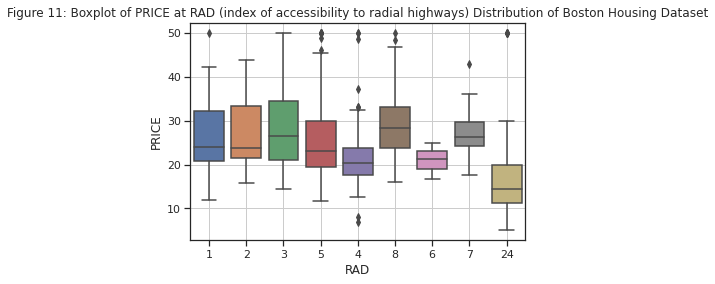

In [ ]:
df_map['RAD'] = df_map['RAD'].map({24:'24', 5:'5', 4:'4', 3:'3', 6:'6', 1:'1', 8:'8', 2:'2', 7:'7'})

sns.boxplot(x='RAD', y='PRICE', data=df_map)
plt.title('Figure 11: Boxplot of PRICE at RAD (index of accessibility to radial highways) Distribution of Boston Housing Dataset')
plt.grid()
plt.show()

# **6. Appropriate mean and proportion test**

### **Mean Test:**
**PRICE**


The distribution of house price for the sample of 511 individual of Boston housing area has a mean USD 22689.2. At 5% level of significance, can we conclude that the mean house price of the population is USD 22689.2?

**Solution:**

Here population standard deviation is not given. So, ttest_1samp will be applicable.

In [ ]:
price = df['PRICE']

# H0: mu0 = 22689.2 i.e the mean house price of the population is USD 22689.2.
mu0 = 22689.2
# H1: mu0 != 22689.2 i.e the mean house price of the population is not USD 22689.2.

alpha = 0.05 #at 5% level of significance

tval, pval = ttest_1samp(price, mu0) 
print('t-value = ',tval, 'and p-value =', pval)

if pval < alpha:
   print("We are rejecting the null hypothesis (H0)\ni.e The mean house price of the population is not USD 22689.2.")
else:
  print("We are not rejecting the null hypothesis (H0)\ni.e The mean house price of the population is USD 22689.2.")

t-value =  -55005.786181898206 and p-value = 0.0
We are rejecting the null hypothesis (H0)
i.e The mean house price of the population is not USD 22689.2.


**PRICE**


The distribution of house price for the sample of 511 individual of Boston housing area has a mean USD 22689.2. At 5% level of significance, can we conclude that the mean house price of the population is USD 22689.2?

### **Proportion Test:**
**CHAS**

when the CHAS variable value is greater than 0, the tracts are bounded by charles river. Test the hypothesis that the proportion of the tracts bounded by the river is 0.6 at 5% level of significance.


In [ ]:
#H0: p0 = 0.6
#H1: p0 < 0.6

count = df.CHAS.value_counts()[1]
nobs = len(df.CHAS)
value = .6
alpha = 0.05 # At 5% level of significance

stat, pval = proportions_ztest(count, nobs, value, alternative='smaller')
print('z-value:', stat)
print('p-value:',pval)

if pval < alpha:
   print("We are rejecting the null hypothesis (H0)\ni.e The proportion of Charles river bounded tract is not 0.6.")
else:
  print("We are not rejecting the null hypothesis (H0)\ni.e The proportion of Charles river bounded tract is 0.6.")

z-value: -47.56666652926063
p-value: 0.0
We are rejecting the null hypothesis (H0)
i.e The proportion of Charles river bounded tract is not 0.6.


# **7. Linear Regression:**

**Fit a suitable model to predict the median value of owner-occupied homes in Boston.**

The linear regression model will predict the dependent variable 'PRICE' using a regression line based on the 13 other independent variables.

The equation of the Linear Regression is 

y = B0 + B1X1 + B2X2 + B3X3 + ... + BnXn + ϵ
 

Where B0 is the intercept, B1,B2,....Bn are the slope of the line and ϵ is the error (residual).

The equation above is used to predict the value of the target variable based on the given predictor variables.

When we are running a Multiple Regression, there are several assumptions that we need to check our data meet, in order for our analysis to be reliable and valid.

https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/



**Assumption #1: The relationship between the IVs and the DV is linear.**

The first assumption of Multiple Regression is that the relationship between the IVs and the DV can be characterised by a straight line. A simple way to check this is by producing scatterplots of the relationship between each of our IVs and our DV.

To fully test the assumption of linearity, we have produced scatterplot with regression line for each of the IVs and the DV in Figure-7, Figure-8 and Figure-9. 

Looking at the scatterplot produced by seaborn with regression line, we can
see that the relationship between the IV and the DV could be modelled by a
straight line, suggesting that the relationship between these variables is
linear. 

Now we are going to split the dataset in training and test dataset:

In [ ]:
target_feature = 'PRICE'
# separate object for target feature
y = df[target_feature]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
506    24.0
507    42.3
508    42.2
509    42.1
510    42.2
Name: PRICE, Length: 511, dtype: float64

In [ ]:
# Saparate object for input features
X = df.drop(target_feature, axis=1)
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.20,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.90,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.10,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.80,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.20,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.06900,10.0,2.30,0.0,0.530,6.500,65.20,4.0100,1.0,290.0,15.0,395.00,4.90
507,18.69000,28.0,2.48,0.0,0.680,6.680,65.38,4.2800,1.0,308.0,33.0,413.00,5.08
508,18.68000,29.0,2.58,0.0,0.780,6.780,65.28,4.1800,1.0,309.0,31.0,408.00,4.38
509,18.67000,30.0,2.68,0.0,0.580,6.680,65.48,4.3800,1.0,310.0,32.0,410.00,4.48


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
# checking the shape similarity
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408, 13) (103, 13) (408,) (103,)


Fitting the data into Linear Regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

Checking how the model is fitted:

In [ ]:
#Train Score
train_score = round(regression.score(X_train, y_train)*100, 2)
print('Training score of Linear Regression: ', train_score)

#Test Score
test_score = round(regression.score(X_test, y_test)*100, 2)
print('Test score of Linear Regression: ', test_score)

Training score of Linear Regression:  71.14
Test score of Linear Regression:  64.67


The high training score and low test score indicates our model1 is over-fitting. That means model1 fits so well in a data with lots of variance then this causes over-fitting. We will fix some multicolinearity and insignificant variable to resolve the over-fitting issue.

Let's check how well model fits the test data:

In [ ]:
y_predict = regression.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
score = round(r2_score(y_test, y_predict)*100, 2)
print('r2_score = ', score)

r2_score =  64.67


In [ ]:
round(regression.score(X_test, y_test)*100, 2)

64.67

In [ ]:
from sklearn import metrics
print('Mean absolute error on TEST DATA of Linear Regression: ', metrics.mean_absolute_error(y_test, y_predict))
print('Mean squared error on TEST DATA of Linear Regression: ', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean squared error on TEST DATA of Linear Regression: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean absolute error on TEST DATA of Linear Regression:  3.4227757993772845
Mean squared error on TEST DATA of Linear Regression:  26.252497869873313
Root Mean squared error on TEST DATA of Linear Regression:  5.123719144320199


In [ ]:
#Applying stats model 
import statsmodels.api as sm

y=y_train
###To run the multiple regression model with all independent variables
x_train = sm.add_constant(X_train)
model1 = sm.OLS(y_train,x_train).fit()
result = model1.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     74.70
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           1.19e-97
Time:                        01:31:28   Log-Likelihood:                -1242.4
No. Observations:                 408   AIC:                             2513.
Df Residuals:                     394   BIC:                             2569.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6485      5.527      1.926      0.0

**We can suspect from the model1 OLS report:** 

R-squared: The model has been able to explain 71% of the variance in the squared residuals, indicating a good fit.
ie. model is 71% fit. 71% of total variation in y (PRICE) is explained by the set of independent variables. 

Adj. R-squared: 0.702 i.e independent variables are relevant to the overall model.

Prob (F-statistic): To check whether the above model is adequate for estimating the price of house, we can conduct the F-test with the following null and alternative hypothesis,

H0: B0 = B1 = 0, (Model is not adequate)

H1: Bi != 0 (i = 0, 1; at least one occurs), (Model is adequate)

We have found that the p-value = 1.03e-119 < 0.05, so we reject the null hypothesis at 5% level of significance. 

Hence, the model is adequate for estimating the house PRICE.

The F-test that the model's parameter values are jointly significant. So there is a good amount of linear relationship between my target variable and independent variable.

CRIM, AGE, PTRATIO, RAD, NOX feature has pvalue>0.05 and t-value is extremely low, so they are insignificant to the overal model.

We have to drop these variables to build a better model and continue analysis on.




**Assumption #2: Minimal multicollinearity among independent variables.**

But model1 summary report is suggesting strong multicollinearity among independent variables. So we need to fix this also.

**Multicollinearity fixing:**


*   The best way to identify the multicollineariry is to calculate the Variance Inflation Factor (VIF) corresponding to every independent variable in the Dataset.
*   VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regression it against every other variable.
*   VIF score of an independent variable represents how well the variable is explained by other independent variables.

Variance Inflation Factor (VIF)
*   if VIF = 1; No multicollinearity
*   if VIF <= 5; Low multicollinearity (moderately correlated)
*   if VIF >= 5; High multicollinearity

We will remove the variables which are showing VIF > 10.

In [ ]:
# importing library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    #calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calculate_vif(X_train)


**Observation:**

In the above results, identify that variable RM has highest VIF score about 70.914801. So, drop RM from the above results and check again VIF score for other variables.

In [ ]:
# Drop the RM variable from 'X_train'
x_train_mc = X_train.copy()
x_train_mc = x_train_mc.drop(['RM'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
271,0.16211,20.0,6.96,0.0,0.4640,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
204,0.02009,95.0,2.68,0.0,0.4161,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
222,0.62356,0.0,6.20,1.0,0.5070,77.7,3.2721,8.0,307.0,17.4,390.39,9.93
359,4.26131,0.0,18.10,0.0,0.7700,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
138,0.24980,0.0,21.89,0.0,0.6240,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,0.4090,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
502,0.04527,0.0,11.93,0.0,0.5730,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
25,0.84054,0.0,8.14,0.0,0.5380,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
196,0.04011,80.0,1.52,0.0,0.4040,34.1,7.3090,2.0,329.0,12.6,396.90,4.08


In [ ]:
# Calculate again VIF for all independent variables except RM
calculate_vif(x_train_mc)

,variables,VIF
0,CRIM,2.035309
1,ZN,2.528844
2,INDUS,13.635984
3,CHAS,1.143163
4,NOX,55.259972
5,AGE,20.087415
6,DIS,12.368574
7,RAD,13.716332
8,TAX,57.957196
9,PTRATIO,54.278488


**Observation:**

In the above results, identify that variable TAX has the highest VIF score about 57.957196 after dropping RM. So, drop TAX from the above results and check again VIF score for other variables.

In [ ]:
# Drop the TAX variable from 'X_train'
x_train_mc = x_train_mc.drop(['TAX'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,PTRATIO,B,LSTAT
271,0.16211,20.0,6.96,0.0,0.4640,16.3,4.4290,3.0,18.6,396.90,6.59
204,0.02009,95.0,2.68,0.0,0.4161,31.9,5.1180,4.0,14.7,390.55,2.88
222,0.62356,0.0,6.20,1.0,0.5070,77.7,3.2721,8.0,17.4,390.39,9.93
359,4.26131,0.0,18.10,0.0,0.7700,81.3,2.5091,24.0,20.2,390.74,12.67
138,0.24980,0.0,21.89,0.0,0.6240,98.2,1.6686,4.0,21.2,392.04,21.32
...,...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,0.4090,21.4,6.4980,4.0,18.9,396.21,8.10
502,0.04527,0.0,11.93,0.0,0.5730,76.7,2.2875,1.0,21.0,396.90,9.08
25,0.84054,0.0,8.14,0.0,0.5380,85.7,4.4546,4.0,21.0,303.42,16.51
196,0.04011,80.0,1.52,0.0,0.4040,34.1,7.3090,2.0,12.6,396.90,4.08


In [ ]:
# Calculate again VIF for all independent variables except RM
calculate_vif(x_train_mc)

,variables,VIF
0,CRIM,2.035023
1,ZN,2.375284
2,INDUS,10.460611
3,CHAS,1.124341
4,NOX,53.537693
5,AGE,20.062789
6,DIS,12.254965
7,RAD,5.004698
8,PTRATIO,52.233518
9,B,18.975628


**Observation:**

In the above results, identify that variable NOX has the highest VIF score about 53.537693 after dropping TAX. So, drop NOX from the above results and check again VIF score for other variables.

In [ ]:
# Drop the NOX variable from 'X_train'
x_train_mc = x_train_mc.drop(['NOX'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,PTRATIO,B,LSTAT
271,0.16211,20.0,6.96,0.0,16.3,4.4290,3.0,18.6,396.90,6.59
204,0.02009,95.0,2.68,0.0,31.9,5.1180,4.0,14.7,390.55,2.88
222,0.62356,0.0,6.20,1.0,77.7,3.2721,8.0,17.4,390.39,9.93
359,4.26131,0.0,18.10,0.0,81.3,2.5091,24.0,20.2,390.74,12.67
138,0.24980,0.0,21.89,0.0,98.2,1.6686,4.0,21.2,392.04,21.32
...,...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,21.4,6.4980,4.0,18.9,396.21,8.10
502,0.04527,0.0,11.93,0.0,76.7,2.2875,1.0,21.0,396.90,9.08
25,0.84054,0.0,8.14,0.0,85.7,4.4546,4.0,21.0,303.42,16.51
196,0.04011,80.0,1.52,0.0,34.1,7.3090,2.0,12.6,396.90,4.08


In [ ]:
# Calculate again VIF for all independent variables except RM
calculate_vif(x_train_mc)

,variables,VIF
0,CRIM,2.035007
1,ZN,2.308269
2,INDUS,9.375668
3,CHAS,1.116852
4,AGE,16.710109
5,DIS,12.233108
6,RAD,4.849447
7,PTRATIO,42.417846
8,B,18.055948
9,LSTAT,8.542252


**Observation:**

In the above results, identify that variable PTRATIO has the highest VIF score about 42.417846 after dropping NOX. So, drop PTRATIO from the above results and check again VIF score for other variables.

In [ ]:
# Drop the PTRATIO variable from 'X_train'
x_train_mc = x_train_mc.drop(['PTRATIO'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,AGE,DIS,RAD,B,LSTAT
271,0.16211,20.0,6.96,0.0,16.3,4.4290,3.0,396.90,6.59
204,0.02009,95.0,2.68,0.0,31.9,5.1180,4.0,390.55,2.88
222,0.62356,0.0,6.20,1.0,77.7,3.2721,8.0,390.39,9.93
359,4.26131,0.0,18.10,0.0,81.3,2.5091,24.0,390.74,12.67
138,0.24980,0.0,21.89,0.0,98.2,1.6686,4.0,392.04,21.32
...,...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,21.4,6.4980,4.0,396.21,8.10
502,0.04527,0.0,11.93,0.0,76.7,2.2875,1.0,396.90,9.08
25,0.84054,0.0,8.14,0.0,85.7,4.4546,4.0,303.42,16.51
196,0.04011,80.0,1.52,0.0,34.1,7.3090,2.0,396.90,4.08


In [ ]:
# Calculate again VIF for all independent variables except RM
calculate_vif(x_train_mc)

,variables,VIF
0,CRIM,1.985081
1,ZN,2.250550
2,INDUS,8.775334
3,CHAS,1.104830
4,AGE,14.073306
5,DIS,8.242200
6,RAD,4.538790
7,B,13.469670
8,LSTAT,8.540820


Observation:

In the above results, identify that variable AGE has the highest VIF score about 14.073306 after dropping PTRATIO. So, drop AGE from the above results and check again VIF score for other variables.

In [ ]:
# Drop the AGE variable from 'X_train'
x_train_mc = x_train_mc.drop(['AGE'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,DIS,RAD,B,LSTAT
271,0.16211,20.0,6.96,0.0,4.4290,3.0,396.90,6.59
204,0.02009,95.0,2.68,0.0,5.1180,4.0,390.55,2.88
222,0.62356,0.0,6.20,1.0,3.2721,8.0,390.39,9.93
359,4.26131,0.0,18.10,0.0,2.5091,24.0,390.74,12.67
138,0.24980,0.0,21.89,0.0,1.6686,4.0,392.04,21.32
...,...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,6.4980,4.0,396.21,8.10
502,0.04527,0.0,11.93,0.0,2.2875,1.0,396.90,9.08
25,0.84054,0.0,8.14,0.0,4.4546,4.0,303.42,16.51
196,0.04011,80.0,1.52,0.0,7.3090,2.0,396.90,4.08


In [ ]:
# Calculate again VIF for all independent variables except RM
calculate_vif(x_train_mc)

,variables,VIF
0,CRIM,1.983020
1,ZN,2.211315
2,INDUS,7.872754
3,CHAS,1.094753
4,DIS,8.103903
5,RAD,4.449457
6,B,10.065339
7,LSTAT,7.321276


Observation:

In the above results, identify that variable B has the highest VIF score about 10.065339 after dropping PTRATIO and which is greater than 10. So, drop B from the above results and check again VIF score for other variables.

In [ ]:
# Drop the AGE variable from 'X_train'
x_train_mc = x_train_mc.drop(['B'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,DIS,RAD,LSTAT
271,0.16211,20.0,6.96,0.0,4.4290,3.0,6.59
204,0.02009,95.0,2.68,0.0,5.1180,4.0,2.88
222,0.62356,0.0,6.20,1.0,3.2721,8.0,9.93
359,4.26131,0.0,18.10,0.0,2.5091,24.0,12.67
138,0.24980,0.0,21.89,0.0,1.6686,4.0,21.32
...,...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,6.4980,4.0,8.10
502,0.04527,0.0,11.93,0.0,2.2875,1.0,9.08
25,0.84054,0.0,8.14,0.0,4.4546,4.0,16.51
196,0.04011,80.0,1.52,0.0,7.3090,2.0,4.08


In [ ]:
# Calculate again VIF for all independent variables except RM
calculate_vif(x_train_mc)

,variables,VIF
0,CRIM,1.968904
1,ZN,2.196854
2,INDUS,6.558438
3,CHAS,1.075482
4,DIS,3.750723
5,RAD,4.419459
6,LSTAT,7.192645


Finally we get 7 independent variables who have VIF score less than 10. Now we will check our model score again.

In [ ]:
y=y_train
###To run the multiple regression model with all independent variables
x_train_new = sm.add_constant(x_train_mc)
model2 = sm.OLS(y_train,x_train_new).fit()
result = model2.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     96.90
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           4.04e-82
Time:                        01:31:29   Log-Likelihood:                -1293.6
No. Observations:                 408   AIC:                             2603.
Df Residuals:                     400   BIC:                             2635.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9219      1.407     30.509      0.0

**We can suspect from the model2 OLS report:** 

There are no more multicollinearity issue in our model2.

Our model2 is suggesting an insignificant variable RAD as p-value = 0.988 > 0.05.

Now, we are going to eliminate the RAD variable continue our analysis.


In [ ]:
# Drop the RAD variable from 'x_train_mp' for larger p-value
x_train_mc = x_train_mc.drop(['RAD'], axis=1)
x_train_mc

,CRIM,ZN,INDUS,CHAS,DIS,LSTAT
271,0.16211,20.0,6.96,0.0,4.4290,6.59
204,0.02009,95.0,2.68,0.0,5.1180,2.88
222,0.62356,0.0,6.20,1.0,3.2721,9.93
359,4.26131,0.0,18.10,0.0,2.5091,12.67
138,0.24980,0.0,21.89,0.0,1.6686,21.32
...,...,...,...,...,...,...
67,0.05789,12.5,6.07,0.0,6.4980,8.10
502,0.04527,0.0,11.93,0.0,2.2875,9.08
25,0.84054,0.0,8.14,0.0,4.4546,16.51
196,0.04011,80.0,1.52,0.0,7.3090,4.08


In [ ]:
y=y_train
###To run the multiple regression model with all independent variables
x_train_new = sm.add_constant(x_train_mc)
model3 = sm.OLS(y_train,x_train_new).fit()
result = model3.summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           3.64e-83
Time:                        01:31:29   Log-Likelihood:                -1293.6
No. Observations:                 408   AIC:                             2601.
Df Residuals:                     401   BIC:                             2629.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9195      1.396     30.751      0.0

**We can suspect from the model3 OLS report:** 

No Multicollinearity & insignificant variable in our model3.

We are going to run our analysis based on the independent variable CRIM, ZN, INDUS, CHAS, DIS and LSTAT. There p-value < 0.05.

Again, we are going to check the training score and test score of our model3.

In [ ]:
# Dropping the variables from 'X_test' to equivalence with x_train_mc
x_test_mc = X_test.drop(['NOX','RM','AGE','RAD','TAX','PTRATIO','B'], axis=1)
x_test_mc

,CRIM,ZN,INDUS,CHAS,DIS,LSTAT
453,8.24809,0.0,18.10,0.0,2.4527,16.74
159,1.42502,0.0,19.58,0.0,1.7659,7.39
162,1.83377,0.0,19.58,1.0,2.0407,1.92
13,0.62976,0.0,8.14,0.0,4.7075,8.26
187,0.07875,45.0,3.44,0.0,3.7886,6.68
...,...,...,...,...,...,...
416,10.83420,0.0,18.10,0.0,1.8195,25.79
328,0.06617,0.0,3.24,0.0,5.2146,9.97
80,0.04113,25.0,4.86,0.0,5.4007,5.29
358,5.20177,0.0,18.10,1.0,2.7227,11.48


Checking x_train_mc, x_test_mc, y_train and y_test are in similar shape.

In [ ]:
print(x_train_mc.shape, x_test_mc.shape, y_train.shape, y_test.shape)

(408, 6) (103, 6) (408,) (103,)


Fitting model3:

In [ ]:
regression2 = LinearRegression()

regression2.fit(x_train_mc, y_train)

LinearRegression()

Checking training and test score: 

In [ ]:
#Train Score
train_score = round(regression2.score(x_train_mc, y_train)*100, 2)
print('Training score of Linear Regression: ', train_score)

#Test Score
test_score = round(regression2.score(x_test_mc, y_test)*100, 2)
print('Test score of Linear Regression: ', test_score)

Training score of Linear Regression:  62.9
Test score of Linear Regression:  65.51


The difference between training score and test score minimize and we can assume our model3 is fitted. We will use model3 further multiple linear regression analysis.

In [ ]:
y_predict = regression2.predict(x_test_mc)

In [ ]:
score = round(r2_score(y_test, y_predict)*100, 2)
print('r2_score = ', score)

r2_score =  65.51


In [ ]:
round(regression2.score(x_test_mc, y_test)*100, 2)

65.51

In [ ]:
print('Mean absolute error on TEST DATA of Linear Regression: ', metrics.mean_absolute_error(y_test, y_predict))
print('Mean squared error on TEST DATA of Linear Regression: ', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean squared error on TEST DATA of Linear Regression: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean absolute error on TEST DATA of Linear Regression:  3.537577309307053
Mean squared error on TEST DATA of Linear Regression:  25.628676689035288
Root Mean squared error on TEST DATA of Linear Regression:  5.062477327261356


Checking Residual:

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual/Variance': y_test - y_predict})
df1

,Actual,Predicted,Residual/Variance
453,17.8,17.565436,0.234564
159,23.3,26.573843,-3.273843
162,50.0,34.346778,15.653222
13,20.4,24.622146,-4.222146
187,32.0,33.495844,-1.495844
...,...,...,...
416,7.5,11.084535,-3.584535
328,19.3,24.089457,-4.789457
80,28.0,29.326528,-1.326528
358,22.7,25.498406,-2.798406


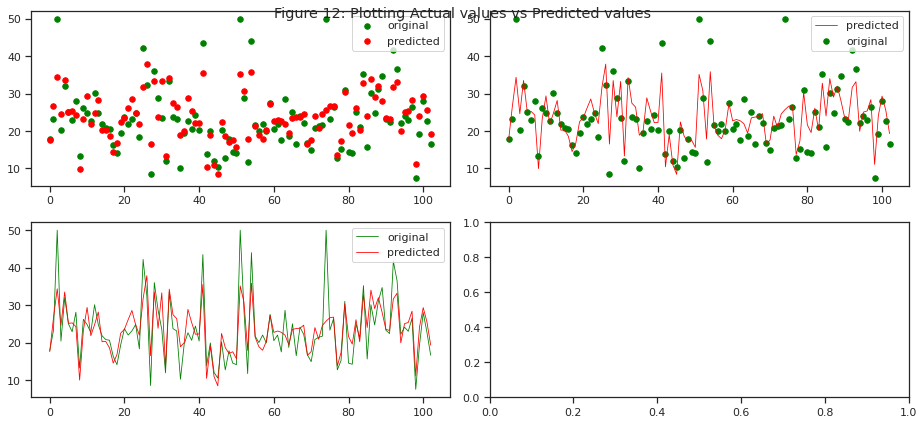

In [ ]:
#plotting the Actual values vs Predicted values

fig,axes= plt.subplots(nrows=2, ncols=2, figsize = (13,6))
x_axes = range(len(X_test))

#To reference the graph on row 1 column 1, we use the statement, axes[0][0]
axes[0][0].scatter(x_axes, y_test, s=30, color='green', label='original')
axes[0][0].scatter(x_axes, y_predict, s=30, color='red', label='predicted')
axes[0][0].legend()

#To reference the graph on row 1 column 2, we use the statement, axes[0][1]
axes[0][1].scatter(x_axes, y_test, s=30, color='green', label='original')
axes[0][1].plot(x_axes, y_predict, lw=0.8, color='red', label='predicted')
axes[0][1].legend()

#To reference the graph on row 2 column 1, we use the statement, axes[1][0]
axes[1][0].plot(x_axes, y_test, lw=0.8, color='green', label='original')
axes[1][0].plot(x_axes, y_predict, lw=0.8, color='red', label='predicted')
axes[1][0].legend()

fig.suptitle('Figure 12: Plotting Actual values vs Predicted values')
plt.tight_layout()
plt.show()

So, we can observe the difference between actual and predicted values clearly.

Comparing predicted value with the actual dataset:

In [ ]:
df.head(14)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


here PRICE = target variable = actual y value

Variance/Residual = Actual - Predicted

So, Variance/Residual = 20.4 - 24.622146 = -4.222146

In [ ]:
#here we are considering, x1=CRIM, x2=ZN, x3=INDUS, x4=CHAS, x5=DIS, x6=LSTAT are independent variables.
# x1 = 0.62976, x2 = 0.0, x3= 8.14, x4 = 0.0, x5 = 4.7075, x6 = 8.26

regression2.predict([[0.62976, 0.0, 8.14, 0.0, 4.7075, 8.26]]  )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([24.62214598])

**Assumption #3: Normality of Residual distribution.**


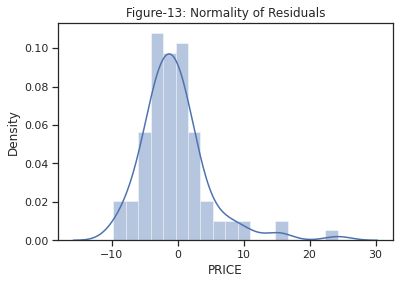

In [ ]:
residuals = y_test - y_predict
sns.distplot(residuals)
plt.title('Figure-13: Normality of Residuals')
plt.show()

We can say it a nearly normal distribution. It centered around 0, which is one of the assumption of a normal distribution.

Now we will create a Q-Q (quantile-quantile) plot to verify it is normaly distributed.

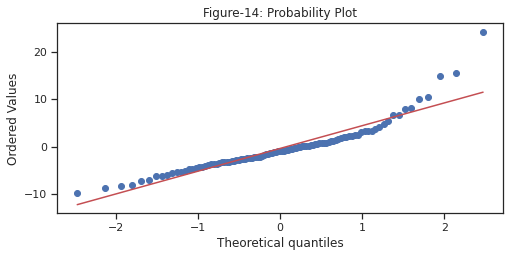

In [ ]:
import scipy as sp

fig, ax = plt.subplots(figsize=(8,3.5))
_, (__, ___, r) = sp.stats.probplot(residuals, plot = ax, fit=True)
plt.title('Figure-14: Probability Plot')
plt.show()


Plotting a probability plot we can see that the observed and theroretical values fall on the same line almost. We can clearly say that the residuals distribution is near normal. 

If a distribution has to be near normal, then the overall mean value of the distribution should also be near zero or equal to zero.

Now I am going to find out the mean value of the distribution of residuals:

In [ ]:
np.mean(residuals)

-0.37525274597787867

mean of the residuals is not zero but near to zero. So we can say, the residuals distribution is near to normal distribution.

**Assumption #4: The variance of the residuals is constant (homoscedasticity).**

Heteroskedasticity occurs when the variance of Y in given X is not constant.

ie. heteroskedasticity = V(Y|X) is not constant.

We can detect heteroskedasticity by residual plot (scatter plot)

To test the fourth assumption, we need to look at the final graph of the output. This tests the assumption of homoscedasticity, which is the assumption that the variation in the residuals (or amount of error in the model) is similar at each point of the model.

This graph plots the standardised values our model would predict, against the standardised residuals obtained. As the predicted values increase (along the X-axis), the variation in the residuals should be roughly similar. If everything is ok, this should look like a random array of dots. 

If the graph looks like a funnel shape, then it is likely that this assumption has been violated.


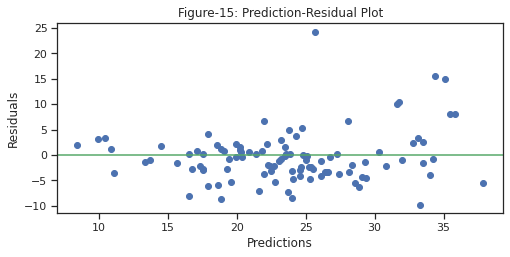

In [ ]:
fig, ax = plt.subplots(figsize=(8,3.5))
_ = ax.scatter(y_predict, residuals)
plt.axhline(y=0, color='g', linestyle='-')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title('Figure-15: Prediction-Residual Plot')
plt.show()

Let’s look at our scatterplot:
As we only have a small number of data points in this example, the graph can be difficult to read - but as it generally appears more random than funnelled, this assumption is probably ok. 

**Assumption #5: The values of the residuals are independent (Auto-correlation).**

The Durbin Watson statistic is a test for autocorrelation in a regression model's output. The DW statistic ranges from zero to four, with a value of 2.0 indicating zero autocorrelation. Values below 2.0 mean there is positive autocorrelation and above 2.0 indicates negative autocorrelation.

So, in our model3, Durbin-Watson: 1.917 indicates positive autocorrelation.

In [ ]:
regression2.intercept_

42.91952631730883

In [ ]:
regression2.coef_

array([-0.09345287,  0.09299277, -0.35480233,  3.84286852, -1.82688268,
       -0.81723805])

In [ ]:
# get Linear coefficient and print them
lr_coefficient = pd.DataFrame()
lr_coefficient['Columns'] = x_train_mc.columns
lr_coefficient['Coefficient Estimate'] = pd.Series(regression2.coef_)
print(lr_coefficient)

  Columns  Coefficient Estimate
0    CRIM             -0.093453
1      ZN              0.092993
2   INDUS             -0.354802
3    CHAS              3.842869
4     DIS             -1.826883
5   LSTAT             -0.817238


Here,

x1= value of CRIM, x2= value of ZN, x3= value of INDUS, x4= value of CHAS, x5= value of DIS, x6= value of LSTAT

m1 = -0.093453, m2 = 0.092993, m3 = -0.354802, m4 = 3.842869, m5 = -1.826883 and m6 = -0.817238


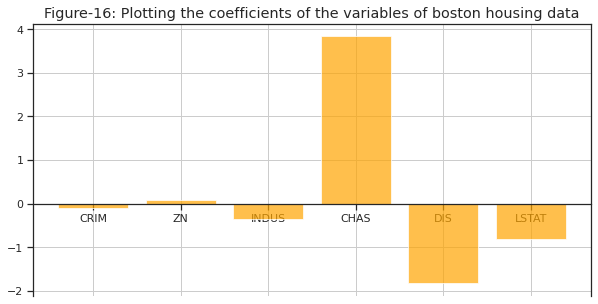

In [ ]:
#plotting the coefficient score

fig, ax = plt.subplots(figsize = (10,5))

ax.bar(lr_coefficient['Columns'], lr_coefficient['Coefficient Estimate'], color='orange', alpha=0.7)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.grid()
plt.title('Figure-16: Plotting the coefficients of the variables of boston housing data')
plt.show()

**Observation:**

The positive coefficients of ZN and CHAS are indicating the positive linear relationship with the dependent variable PRICE. That means, for 1 unit increase (mean value/on average) in ZN and CHAS the house PRICE will increase by $1000.

And the negative coefficients of CRIM, INDUS, DIS and LSTAT are indicating the negative linear relationship with the dependent variable PRICE. That means, For 1 unit increase (mean value/on average) in CRIM, INDUS, DIS and LSTAT, the house PRICE will decrease by $1000.

It calculating with one variable at a time by holding other variables in constant. 

In [ ]:
# y = B0 + B1X1(CRIM) + B2X2(ZN) + B3X3(INDUS) + B3X3(CHAS) + B4X4(DIS) + B5X5(LSTATE) 
42.91952631730883 + -0.093453*0.62976 + 0.092993*0.0 + -0.354802*8.14 + 3.842869*0.0 + -1.826883*4.7075 + -0.817238*8.26

24.62214747352883

24.62214747352883

So, predicted value is also correct according to the mathematical equation.

**Considering the crime is 0.62976% by town, 0% are residential land zone, 8.14% are industrial area, tract is not bounded by the river, 4.7075% distant to five Boston employment centres and 8.26% people are lower status in the neighbourhood. Using the model3 as appropriate regression model we can predict the house price in Boston Housing Area.**

**Thus, we can state that the house PRICE will be approximately $24622 meeting the above neighbourhood criteria.**


# **8. Discussion:**

From all the figures and tables, it is exhibited that different variables have different impact on Boston house price. They are positively and negatively correlated with house PRICE. We have done mean test and proportion test to understand the data. Our findings are – house prices are higher in areas with lower crime. House prices also tend to be higher closer to the Charles River, and houses with more rooms are pricier. The most interesting factors to consider are nitrogen oxide levels and distance to the main employment centers. NOX is higher at the close to the main employment centers. And industrial zone (INDUS) is showing high NOX level. And house prices increase when the distance of employment center increase. This suggests that people would prefer to live further away from their place of employment if it meant lower levels of pollution (NOX), which is an interesting point to consider. To predict the price with Multiple Linear Regression, after validating the linear regression assumptions, we considered some significant variables and predicted the house price accurately using the model and simultaneaously with mathematical calculation.


